<a href="https://colab.research.google.com/github/mdkamrulhasan/machine_learning_concepts/blob/master/notebooks/supervised/cifar_cnn_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training an image classifier
We will do the following steps in order:



1.   Load and normalize the CIFAR10 training and test datasets using torchvision
2.   Define a Convolutional Neural Network
3.   Define a loss function
4.   Train the network on the training data
5.   Test the network on the test data

[Adapted from](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

## 1. Load and normalize CIFAR10

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:02<00:00, 71.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Display some images

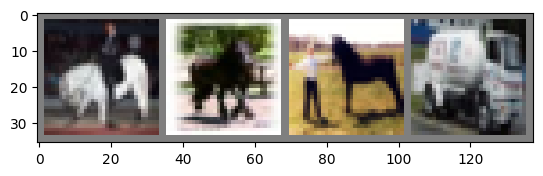

horse horse horse truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

##2. Define a CNN model architecture

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# CNN model instantiation
net = Net()

In [ ]:
from torchsummary import summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


##3. Define a Loss function

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

##4. Model/network training

In [ ]:
NB_EPOCHS = 10

for epoch in range(NB_EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.236
[1,  4000] loss: 1.212
[1,  6000] loss: 1.187
[1,  8000] loss: 1.190
[1, 10000] loss: 1.175
[1, 12000] loss: 1.166
[2,  2000] loss: 1.071
[2,  4000] loss: 1.102
[2,  6000] loss: 1.088
[2,  8000] loss: 1.093
[2, 10000] loss: 1.109
[2, 12000] loss: 1.097
[3,  2000] loss: 1.004
[3,  4000] loss: 1.005
[3,  6000] loss: 1.018
[3,  8000] loss: 1.020
[3, 10000] loss: 1.013
[3, 12000] loss: 1.028
[4,  2000] loss: 0.933
[4,  4000] loss: 0.971
[4,  6000] loss: 0.966
[4,  8000] loss: 0.959
[4, 10000] loss: 0.968
[4, 12000] loss: 0.978
[5,  2000] loss: 0.895
[5,  4000] loss: 0.883
[5,  6000] loss: 0.930
[5,  8000] loss: 0.931
[5, 10000] loss: 0.927
[5, 12000] loss: 0.923
[6,  2000] loss: 0.842
[6,  4000] loss: 0.849
[6,  6000] loss: 0.879
[6,  8000] loss: 0.901
[6, 10000] loss: 0.875
[6, 12000] loss: 0.905
[7,  2000] loss: 0.821
[7,  4000] loss: 0.808
[7,  6000] loss: 0.824
[7,  8000] loss: 0.870
[7, 10000] loss: 0.838
[7, 12000] loss: 0.870
[8,  2000] loss: 0.777
[8,  4000] 

### Save the model for future reference

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Load the model

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

##5. Test the network on test data

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 63 %


### Training on GPU

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [ ]:
#The rest of this section assumes that device is a CUDA device.

#Then these methods will recursively go over all modules and convert their parameters and buffers to CUDA tensors:
net.to(device)

#Remember that you will have to send the inputs and targets at every step to the GPU too:
inputs, labels = data[0].to(device), data[1].to(device)

Why don’t I notice MASSIVE speedup compared to CPU? Because your network is really small.

**Exercise:** Try increasing the width of your network (argument 2 of the first nn.Conv2d, and argument 1 of the second nn.Conv2d – they need to be the same number), see what kind of speedup you get.

Goals achieved:

Understanding PyTorch’s Tensor library and neural networks at a high level.

Train a small neural network to classify images

Training on multiple GPUs
If you want to see even more MASSIVE speedup using all of your GPUs, please check out Optional: Data Parallelism.